
# [Random Forest](https://www.notion.so/mongmang/RandomForest-5855ef47ddda4b11afca5eefc63cb798)
   * dataset에서 샘플 데이터를 random으로 선택,
   * 샘플 데이터에서 feature을 random으로 선택해 decision tree 생성
## Bootstrapped Dataset 만들기 
   * (서로 다른 tree 만듦)
   * 기존 데이터셋에서 Bootstrp 기번을 통해 새로운 data set 생성
   * 기존 데이터 셋에서 반복을 허용하여 데이터를 뽑아낸 뒤, 기존 데이터 셋의 크기 만큼의 데이터 셋을 만듦
 

In [1]:
# 패키지 불러오기
from sklearn.datasets import load_iris
import pandas as pd

# 데이터 불러오기
iris = load_iris()

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 독립변수
iris_df = pd.DataFrame(
    data = iris['data'], 
    columns = ['sepal length','sepal width','petal length','petal width']
)

In [4]:
# 타겟 변수
iris_df['species'] = iris['target']

In [5]:
iris_df.head() # 0~1: setosa', 'versicolor', 'virginica'

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = iris_df.loc[:,:"petal width"]
y = iris_df['species']

## 데이터 분리


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### RandomForest  분류기 생성
Sklearn.ensemble 모듈은 분류, 회귀 및 이상 탐지를 위한 ensemble-based 방법을 포함

* `rfc.fit()`:입력 데이터를 이용해 분류기 학습함
* `rfc.predict()`: 입력 데이터의 분류 결과를 예측함
* `rfc.score()`: 정확도 측정

In [8]:
from sklearn.ensemble import RandomForestClassifier

# 10개 트리를 가진  random forest 생성
rfc = RandomForestClassifier(n_estimators= 10, oob_score= True)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True)

In [9]:
rfc_pred = rfc.predict(X_test)

In [10]:
#정확도 측정
rfc.score(X_test, y_test)

0.9666666666666667

In [11]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=842075422),
 DecisionTreeClassifier(max_features='auto', random_state=527365399),
 DecisionTreeClassifier(max_features='auto', random_state=852401942),
 DecisionTreeClassifier(max_features='auto', random_state=1020546879),
 DecisionTreeClassifier(max_features='auto', random_state=634488572),
 DecisionTreeClassifier(max_features='auto', random_state=618786578),
 DecisionTreeClassifier(max_features='auto', random_state=1112359290),
 DecisionTreeClassifier(max_features='auto', random_state=1100445290),
 DecisionTreeClassifier(max_features='auto', random_state=478107970),
 DecisionTreeClassifier(max_features='auto', random_state=464275291)]

## 시각화

In [13]:
from sklearn import tree
import pydotplus
from PIL import Image
from io import BytesIO

In [14]:
X_train.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [15]:
dt_dot_data1 =tree.export_graphviz(
    rfc.estimators_[0], # 10번쩨 트리
    feature_names = X_train.columns, 
    class_names = ['setosa', 'versicolor', 'virginica'],
)

In [16]:
dt_dot_graph = pydotplus.graph_from_dot_data(dt_dot_data1).create_png()

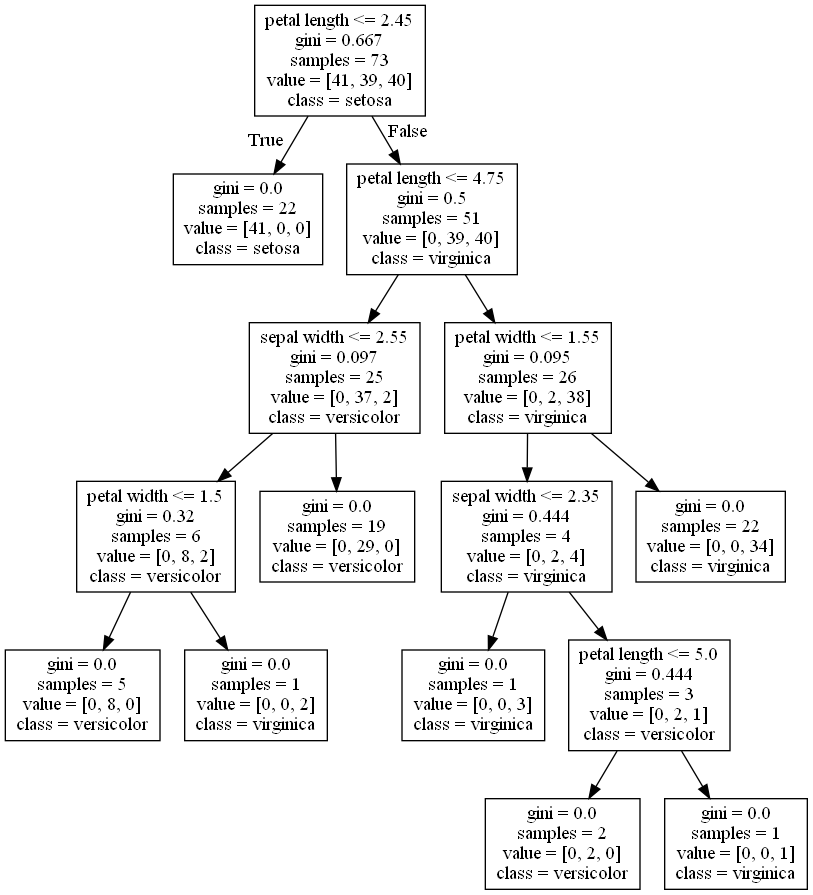

In [17]:
Image.open(BytesIO(dt_dot_graph))

In [18]:
%mkdir RFgraph

A subdirectory or file RFgraph already exists.


In [19]:
%cd RFgraph

C:\Users\Admin\2021 ML\RFgraph


In [20]:
# 트리 10개 모두 다 그래프로 뽑기
for i in range(10):
    dt_dot_data =tree.export_graphviz(
    rfc.estimators_[i], # 첫번쩨 트리
    feature_names = X_train.columns, 
    class_names = ['setosa', 'versicolor', 'virginica'],
    )
    pydotplus.graph_from_dot_data(dt_dot_data).write_pdf("tree"+str(i+1)+".pdf")

In [21]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is B06D-416C

 Directory of C:\Users\Admin\2021 ML\RFgraph

2021-05-07  오후 05:27    <DIR>          .
2021-05-07  오후 05:27    <DIR>          ..
2021-05-07  오후 05:32            26,960 tree1.pdf
2021-05-07  오후 05:33            26,074 tree10.pdf
2021-05-07  오후 05:32            27,086 tree2.pdf
2021-05-07  오후 05:32            26,375 tree3.pdf
2021-05-07  오후 05:32            26,565 tree4.pdf
2021-05-07  오후 05:32            26,543 tree5.pdf
2021-05-07  오후 05:32            26,204 tree6.pdf
2021-05-07  오후 05:32            26,883 tree7.pdf
2021-05-07  오후 05:33            27,876 tree8.pdf
2021-05-07  오후 05:33            26,718 tree9.pdf
              10 File(s)        267,284 bytes
               2 Dir(s)  117,648,633,856 bytes free


## oob_score
일반화 오류를 추정하기 위해 가방 외부 샘플 사용 여부

In [22]:
# leaf에서 각 칼럼 사용 비율
# oob_score = True일 때 가능
f_importance = rfc.feature_importances_
# 변수 명이랑 함께 보기
list(zip(X_train.columns, f_importance))

[('sepal length', 0.18258877039046806),
 ('sepal width', 0.025156975051186258),
 ('petal length', 0.2797138219316545),
 ('petal width', 0.5125404326266911)]

## 예측 정확도 계산하기

In [26]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, rfc_pred)

0.9666666666666667

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, rfc_pred) #  실제X예측

array([[ 9,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  7]], dtype=int64)

# Desicion Tree 비교하기

In [32]:
# 의사 결정 나무 트리, 그래프 그리기 
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [35]:
accuracy_score(y_test, dt_pred).round(4)

0.9333

In [36]:
print('dt_clf_accuracy:', accuracy_score(y_test, dt_pred).round(4))
print('rf_clf_accuracy:',accuracy_score(y_test, rfc_pred).round(4))

dt_clf_accuracy: 0.9333
rf_clf_accuracy: 0.9667


랜덤 포레스트 모델이 의사결정 나무보다 정확도가 더 높다!